In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("BigMartSalesData.csv")
data.index = np.arange(1, len(data)+1)
data.shape
data.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Amount', 'InvoiceDate', 'Day', 'Month', 'Year', 'CustomerID',
       'Country'],
      dtype='object')

##### 1 Plot Total Sales Per Month for Year 2011.  How the total sales haveincreased over months in Year 2011. Which month has lowest Sales?

In [2]:
# data.drop["InvoiceNo","StockCode","Description","Quantity","UnitPrice","InvoiceDate","Day","CustomerID","Country"]

data[["Amount","Month","Year",]]

,Amount,Month,Year
1,15.30,12,2010
2,20.34,12,2010
3,22.00,12,2010
4,20.34,12,2010
5,20.34,12,2010
...,...,...,...
541870,10.20,12,2011
541871,12.60,12,2011
541872,16.60,12,2011
541873,16.60,12,2011


In [3]:
year2011=data.loc[data['Year']==2011]
year2011

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
42480,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,19.50,04-01-11,4,1,2011,13313.0,United Kingdom
42481,539993,21499,BLUE POLKADOT WRAP,25,0.42,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42482,539993,21498,RED RETROSPOT WRAP,25,0.42,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42483,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,10.50,04-01-11,4,1,2011,13313.0,United Kingdom
42484,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,12.50,04-01-11,4,1,2011,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541870,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,09-12-11,9,12,2011,12680.0,France
541871,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,09-12-11,9,12,2011,12680.0,France
541872,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France
541873,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France


In [4]:
# %matplotlib inline
# plt.bar(year2011["Month"],year2011["Amount"])
# plt.show()

In [5]:
gb=year2011.groupby("Month")["Amount"].sum().to_frame().reset_index()
gb


,Month,Amount
0,1,822669.640
1,2,549134.460
2,3,752003.310
3,4,582318.451
4,5,817655.200
5,6,832231.670
6,7,757108.941
7,8,791173.020
8,9,1097467.722
9,10,1239237.260


In [6]:
gb.set_index(np.arange(1, len(gb)+1))

,Month,Amount
1,1,822669.640
2,2,549134.460
3,3,752003.310
4,4,582318.451
5,5,817655.200
6,6,832231.670
7,7,757108.941
8,8,791173.020
9,9,1097467.722
10,10,1239237.260


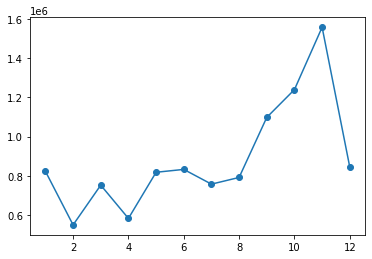

In [7]:
plt.plot(gb["Month"],gb["Amount"],marker="o")

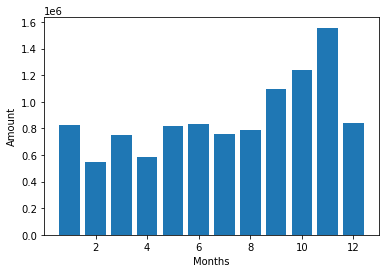

In [8]:
plt.bar(gb["Month"],gb["Amount"])
# plt.xlim([0,13])
# plt.set_ylim([0,6])
plt.xlabel("Months")
plt.ylabel("Amount")
# plt.legend()
plt.show()

In [9]:
lowest=gb["Amount"].min()
lowest

549134.460000018

In [10]:
gb.loc[gb["Amount"]==lowest]

,Month,Amount
1,2,549134.46


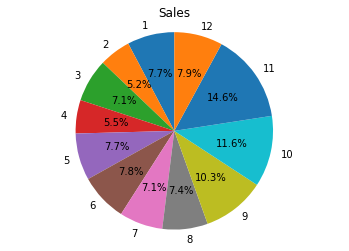

In [11]:
slices=gb["Amount"]
months =gb["Month"]
# colors = ['r', 'g']
plt.pie(slices, labels=months, startangle=90, autopct='%.1f%%')
plt.title('Sales')
plt.axis('equal')
plt.show()

In [12]:
data[["Amount","Month","Year","Country"]]

,Amount,Month,Year,Country
1,15.30,12,2010,United Kingdom
2,20.34,12,2010,United Kingdom
3,22.00,12,2010,United Kingdom
4,20.34,12,2010,United Kingdom
5,20.34,12,2010,United Kingdom
...,...,...,...,...
541870,10.20,12,2011,France
541871,12.60,12,2011,France
541872,16.60,12,2011,France
541873,16.60,12,2011,France


In [13]:
co=year2011.groupby("Country")["Amount"].sum().to_frame().reset_index()
co

,Country,Amount
0,Australia,1.389047e+05
1,Austria,9.945680e+03
2,Bahrain,7.541400e+02
3,Belgium,3.967181e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.045106e+04
7,Cyprus,1.264365e+04
8,Czech Republic,9.457600e+02
9,Denmark,1.786104e+04


In [14]:
co.set_index(np.arange(1, len(co)+1))

,Country,Amount
1,Australia,1.389047e+05
2,Austria,9.945680e+03
3,Bahrain,7.541400e+02
4,Belgium,3.967181e+04
5,Brazil,1.143600e+03
6,Canada,3.666380e+03
7,Channel Islands,2.045106e+04
8,Cyprus,1.264365e+04
9,Czech Republic,9.457600e+02
10,Denmark,1.786104e+04


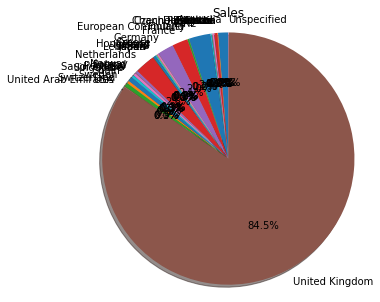

In [27]:
slices =co["Amount"]
countries =co["Country"]
plt.figure(figsize=(5, 5))
plt.pie(slices, labels=countries,shadow=True, startangle=90, autopct='%.1f%%')
plt.title('Sales')
plt.axis('equal')
plt.show()

<BarContainer object of 37 artists>

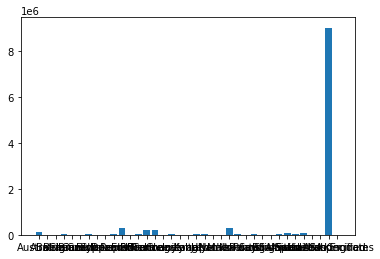

In [16]:
plt.bar(co["Country"],co["Amount"])

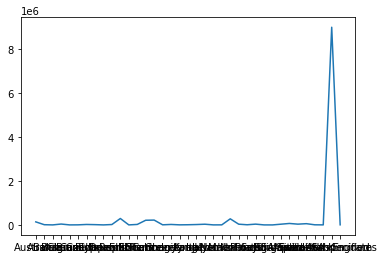

In [17]:
plt.plot(co["Country"],co["Amount"])

In [18]:
sc=year2011.groupby("InvoiceNo")["Amount"].sum().to_frame().reset_index()
sc

,InvoiceNo,Amount
0,539993,307.30
1,539994,0.00
2,539995,0.00
3,539996,0.00
4,539997,0.00
...,...,...
23867,C581484,168469.60
23868,C581490,32.53
23869,C581499,224.69
23870,C581568,54.75


In [19]:
data.loc[data['InvoiceNo']=="C581569"]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
541682,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,1,1.25,1.25,09-12-11,9,12,2011,17315.0,United Kingdom
541683,C581569,20979,36 PENCILS TUBE RED RETROSPOT,5,1.25,6.25,09-12-11,9,12,2011,17315.0,United Kingdom


In [20]:
sc.set_index(np.arange(1,len(sc)+1))

,InvoiceNo,Amount
1,539993,307.30
2,539994,0.00
3,539995,0.00
4,539996,0.00
5,539997,0.00
...,...,...
23868,C581484,168469.60
23869,C581490,32.53
23870,C581499,224.69
23871,C581568,54.75


In [ ]:
plt.scatter(sc["InvoiceNo"],sc["Amount"])
plt.xlabel("Invoice")
plt.ylabel("Amount")
plt.show()